In [38]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Dropout, Conv1D, GlobalMaxPooling1D
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import TensorBoard
from time import time
import matplotlib.pyplot as plt

In [39]:
training_data= pd.read_csv("./train.tsv", sep="\t")
print(training_data.shape)
training_data.head
testing_data = pd.read_csv("./test.tsv", sep="\t")
print(training_data.shape)
training_data.head

(156060, 4)
(156060, 4)


<bound method NDFrame.head of         PhraseId  SentenceId  \
0              1           1   
1              2           1   
2              3           1   
3              4           1   
4              5           1   
...          ...         ...   
156055    156056        8544   
156056    156057        8544   
156057    156058        8544   
156058    156059        8544   
156059    156060        8544   

                                                   Phrase  Sentiment  
0       A series of escapades demonstrating the adage ...          1  
1       A series of escapades demonstrating the adage ...          2  
2                                                A series          2  
3                                                       A          2  
4                                                  series          2  
...                                                   ...        ...  
156055                                          Hearst 's          2  
156056           

In [40]:
training_data = training_data.drop(columns=['PhraseId', 'SentenceId'])
testing_data = testing_data.drop(columns=['PhraseId', 'SentenceId'])

label=training_data[['Sentiment']]
training_data=training_data.drop(columns=['Sentiment'])
training_data['Phrase'] = training_data['Phrase'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x.lower()))
testing_data['Phrase'] = testing_data['Phrase'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x.lower()))

max_features =5000
token = Tokenizer(num_words=max_features, split=' ')
token.fit_on_texts(training_data['Phrase'].values)
X_train = token.texts_to_sequences(training_data['Phrase'].values)
X_train = pad_sequences(X_train)

max_features = 2000
token = Tokenizer(num_words=max_features, split=' ')
token.fit_on_texts(testing_data['Phrase'].values)
x_test = token.texts_to_sequences(testing_data['Phrase'].values)
x_test = pad_sequences(x_test)

label_encode = LabelEncoder()
integer_encode = label_encode.fit_transform(label)
y_train = to_categorical(integer_encode)
x_tr, x_te, y_tr, y_te = train_test_split(X_train, y_train, test_size=0.25, random_state=30)
print(x_tr.shape, y_tr.shape)
print(x_te.shape, y_te.shape)

(117045, 46) (117045, 5)
(39015, 46) (39015, 5)


C:\Users\bharg\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
label_encode = LabelEncoder()
integer_encode = label_encode.fit_transform(label)
y_train = to_categorical(integer_encode)
x_tr, x_te, y_tr, y_te = train_test_split(X_train, y_train, test_size=0.25, random_state=30)
print(x_tr.shape, y_tr.shape)
print(x_te.shape, y_te.shape)

(117045, 46) (117045, 5)
(39015, 46) (39015, 5)


In [30]:
history= model.fit(x_tr, y_tr, validation_data=(x_te, y_te), epochs=5, batch_size=512, verbose=2)

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 117045 samples, validate on 39015 samples
Epoch 1/5
 - 16s - loss: 1.2077 - accuracy: 0.5338 - val_loss: 1.0747 - val_accuracy: 0.5895
Epoch 2/5
 - 16s - loss: 0.9580 - accuracy: 0.6224 - val_loss: 0.9381 - val_accuracy: 0.6274
Epoch 3/5
 - 16s - loss: 0.8834 - accuracy: 0.6495 - val_loss: 0.9086 - val_accuracy: 0.6346
Epoch 4/5
 - 16s - loss: 0.8460 - accuracy: 0.6635 - val_loss: 0.8907 - val_accuracy: 0.6418
Epoch 5/5
 - 15s - loss: 0.8178 - accuracy: 0.6747 - val_loss: 0.8840 - val_accuracy: 0.6424


In [31]:
scores = model.evaluate(x_te, y_te, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 64.24%


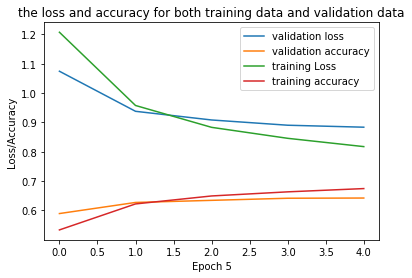

In [37]:
from keras.optimizers import adam
#in the above model evaluation, loss has been increased hence it is overfitting model, to overcome we will include learning rate
s=adam(lr=0.001)
model1= Sequential()
model1.add(Embedding(5000,max_words))
model1.add(Dropout(0.2))
model1.add(Conv1D(64,kernel_size=3,padding='same',activation='relu',strides=1))
model1.add(GlobalMaxPooling1D())
model1.add(Dense(128,activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(num_classes,activation='softmax'))
model1.compile(loss='binary_crossentropy',optimizer=s,metrics=['accuracy'])

In [33]:
from keras.optimizers import adam
#in the above model evaluation, loss has been increased hence it is overfitting model, to overcome we will include learning rate
s=adam(lr=0.001)
model1= Sequential()
model1.add(Embedding(5000,max_words))
model1.add(Dropout(0.2))
model1.add(Conv1D(64,kernel_size=3,padding='same',activation='relu',strides=1))
model1.add(GlobalMaxPooling1D())
model1.add(Dense(128,activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(num_classes,activation='softmax'))
model1.compile(loss='binary_crossentropy',optimizer=s,metrics=['accuracy'])

In [34]:
history1=model1.fit(x_tr, y_tr, validation_data=(x_te, y_te), epochs=5, batch_size=51, verbose=1)


Train on 117045 samples, validate on 39015 samples
Epoch 1/5
117045/117045 [==============================] - 28s 239us/step - loss: 0.3487 - accuracy: 0.8470 - val_loss: 0.3213 - val_accuracy: 0.8555
Epoch 2/5
117045/117045 [==============================] - 27s 230us/step - loss: 0.3072 - accuracy: 0.8635 - val_loss: 0.3084 - val_accuracy: 0.8605
Epoch 3/5
117045/117045 [==============================] - 26s 220us/step - loss: 0.2919 - accuracy: 0.8708 - val_loss: 0.3052 - val_accuracy: 0.8622
Epoch 4/5
117045/117045 [==============================] - 27s 228us/step - loss: 0.2815 - accuracy: 0.8757 - val_loss: 0.3064 - val_accuracy: 0.8624
Epoch 5/5
117045/117045 [==============================] - 27s 227us/step - loss: 0.2742 - accuracy: 0.8789 - val_loss: 0.3041 - val_accuracy: 0.8633


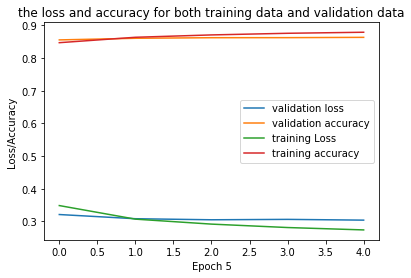

In [36]:
plt.figure()
plt.plot(history1.history["val_loss"], label="validation loss")
plt.plot(history1.history["val_accuracy"], label="validation accuracy")
plt.plot(history1.history["loss"], label="training Loss")
plt.plot(history1.history["accuracy"], label="training accuracy")
plt.title("the loss and accuracy for both training data and validation data")
plt.xlabel("Epoch 5")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")